<a href="https://colab.research.google.com/github/sarthak-2002/Natural-Language-Processing/blob/main/PDF_READER_USING_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!apt-get install poppler-utils #PDF Rendering S/w

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (271 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [3]:
#!pip install pdf2image #within poppler
#!pip install easyocr #to exract data from pdf

     |████████████████████████████████| 63.2MB 46kB/s 


In [4]:
from pdf2image import convert_from_path #location of pdf file
import easyocr
import numpy as np
import PIL #draw bounding boxes
from PIL import ImageDraw
import spacy

In [5]:
reader = easyocr.Reader(['en'])

In [84]:
images = convert_from_path('Welcome_Letter_2020-22_000197.pdf')

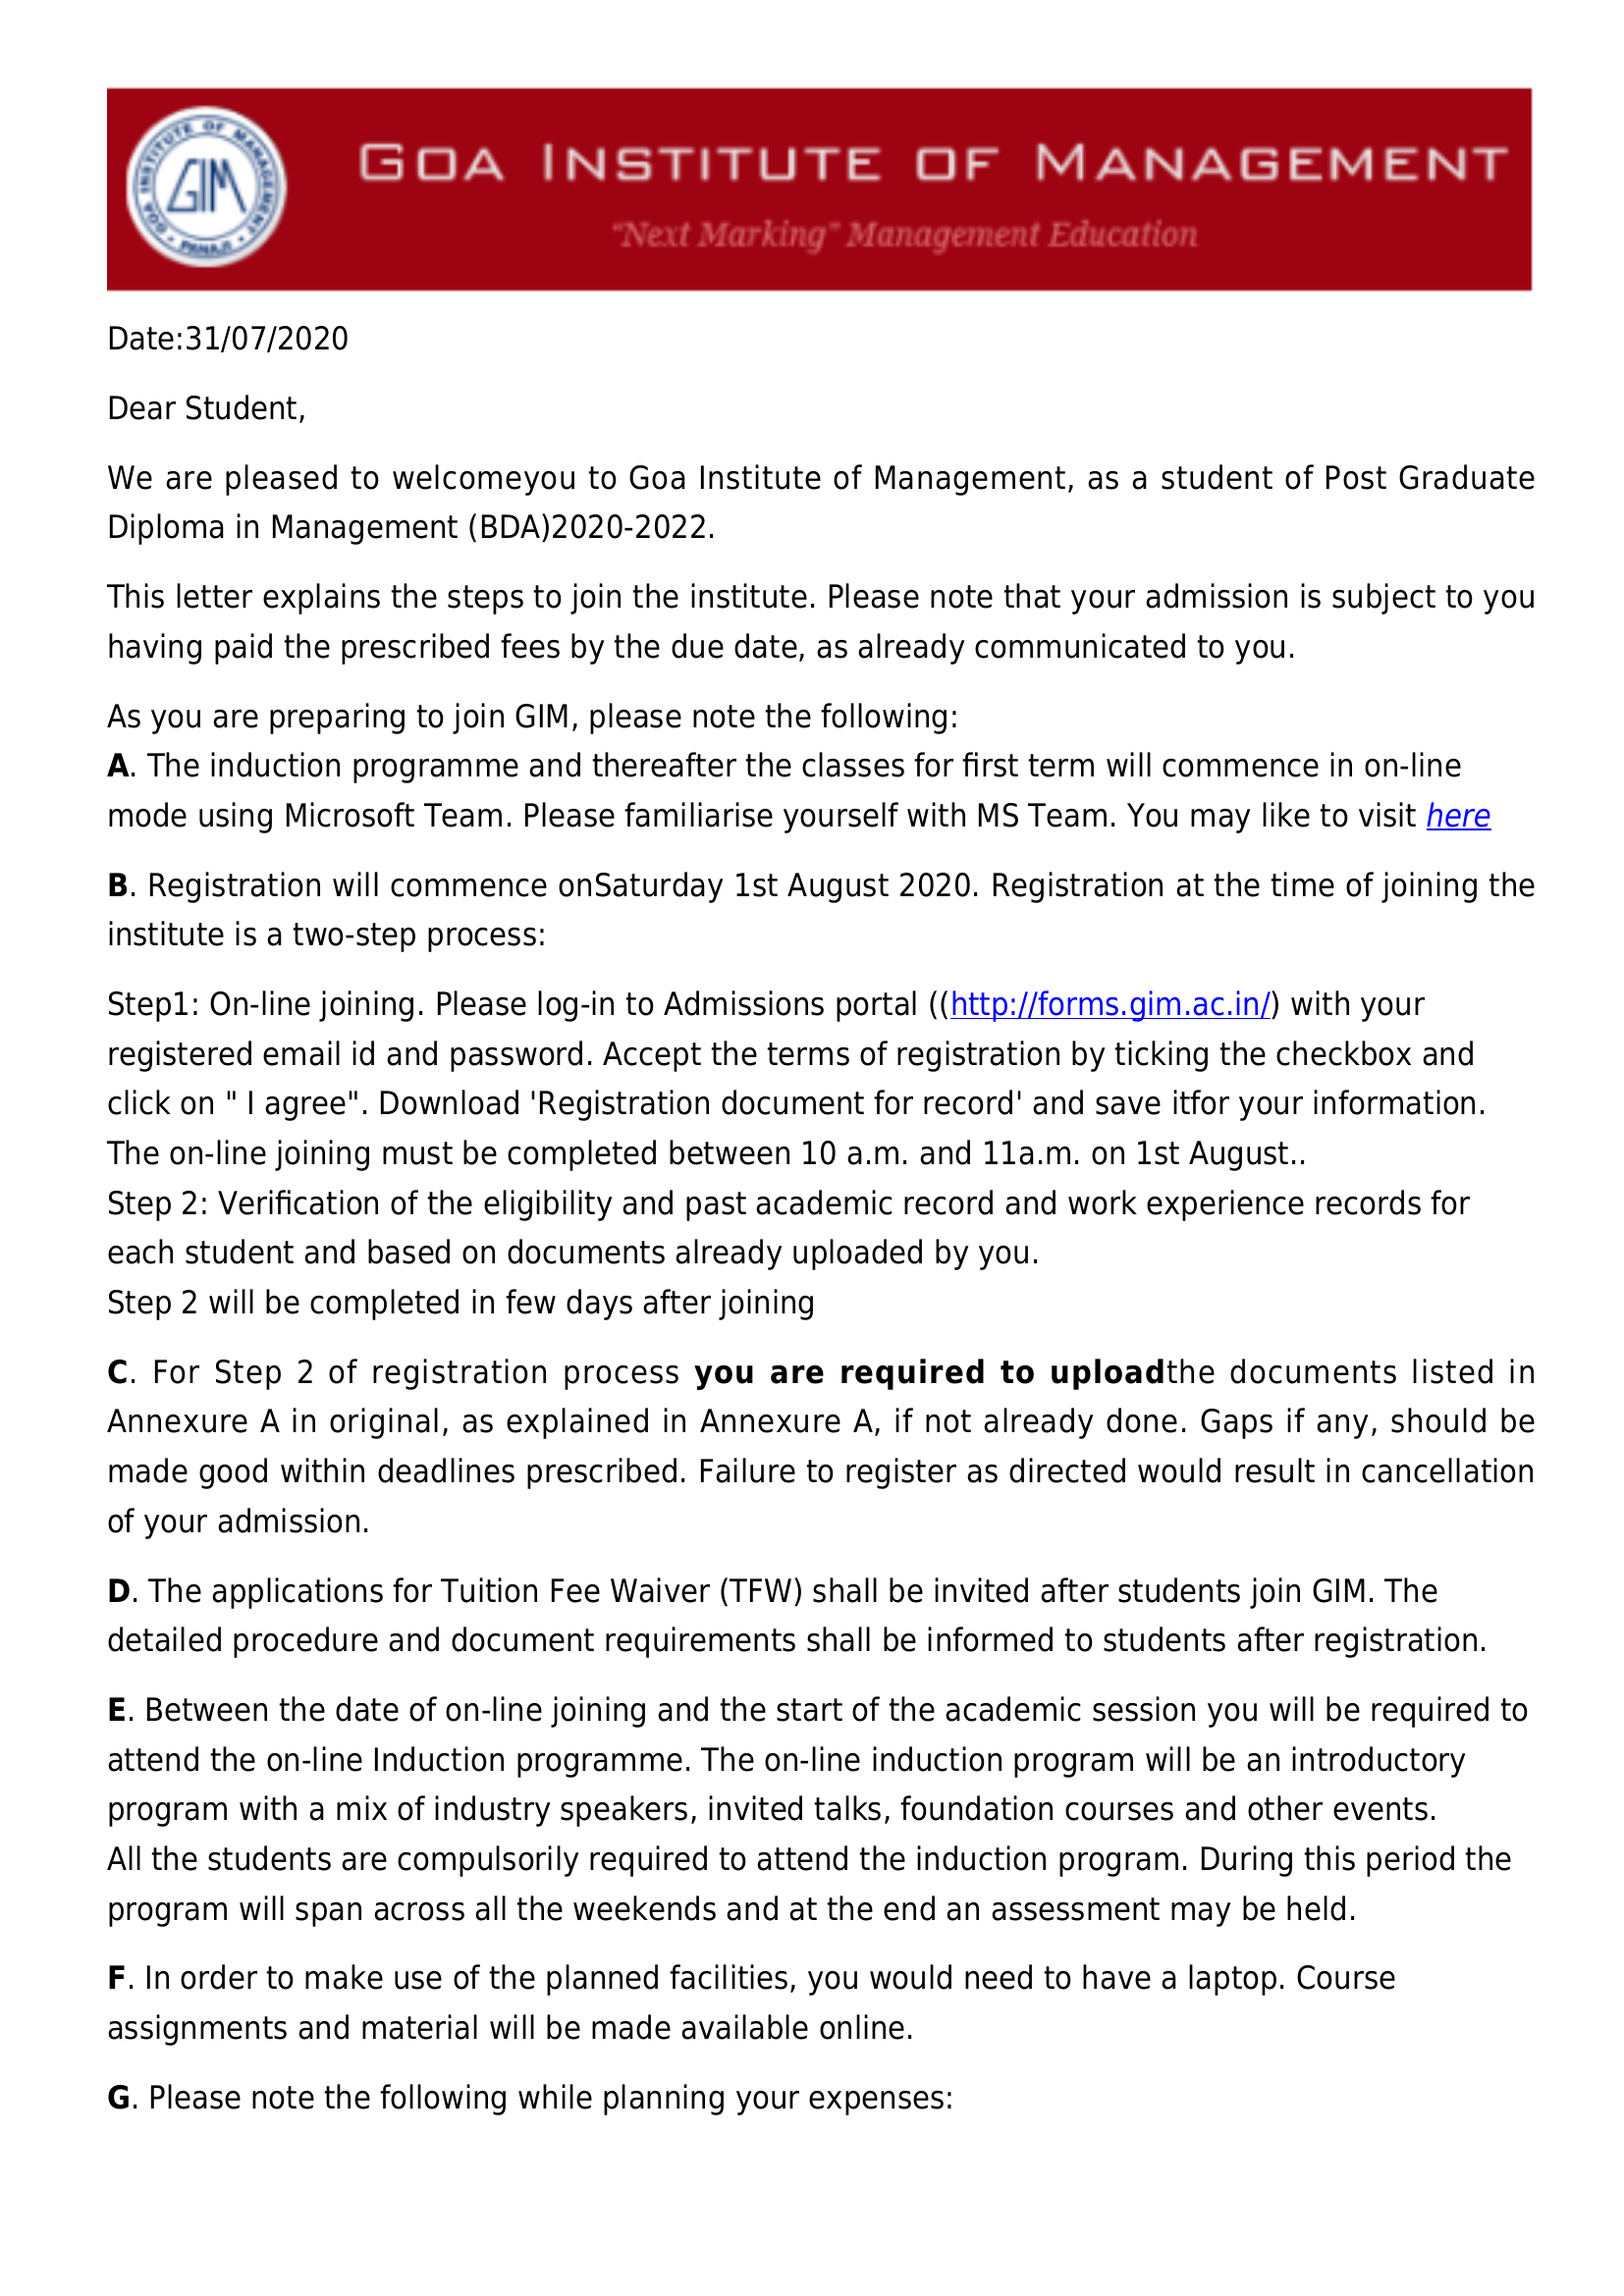

In [85]:
from IPython.display import display, Image
display(images[0])

In [86]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[362, 136], [1543, 136], [1543, 198], [362, 198]],
  'GOA INSTITUTE OF MANAGEMENT',
  0.8304321529955576),
 ([[621, 221], [709, 221], [709, 257], [621, 257]],
  'FNett',
  0.3479718936367389),
 ([[701, 208], [1229, 208], [1229, 268], [701, 268]],
  'Marking " Management Education',
  0.8418039167293584),
 ([[107, 327], [361, 327], [361, 365], [107, 365]],
  'Date:31/07/2020',
  0.8655861856179695),
 ([[107, 397], [317, 397], [317, 437], [107, 437]],
  'Dear Student,',
  0.8750947726517443),
 ([[106, 462], [1570, 462], [1570, 513], [106, 513]],
  'We are pleased to welcomeyou to Goa Institute of Management; as a student of Post Graduate',
  0.6183456368262232),
 ([[105, 517], [729, 517], [729, 561], [105, 561]],
  'Diploma in Management (BDA)2020-2022.',
  0.513781759231472),
 ([[106, 582], [1570, 582], [1570, 635], [106, 635]],
  'This letter explains the steps to join the institute. Please note that your admission is subject to you',
  0.7592200369277422),
 ([[104, 634], [1322, 634

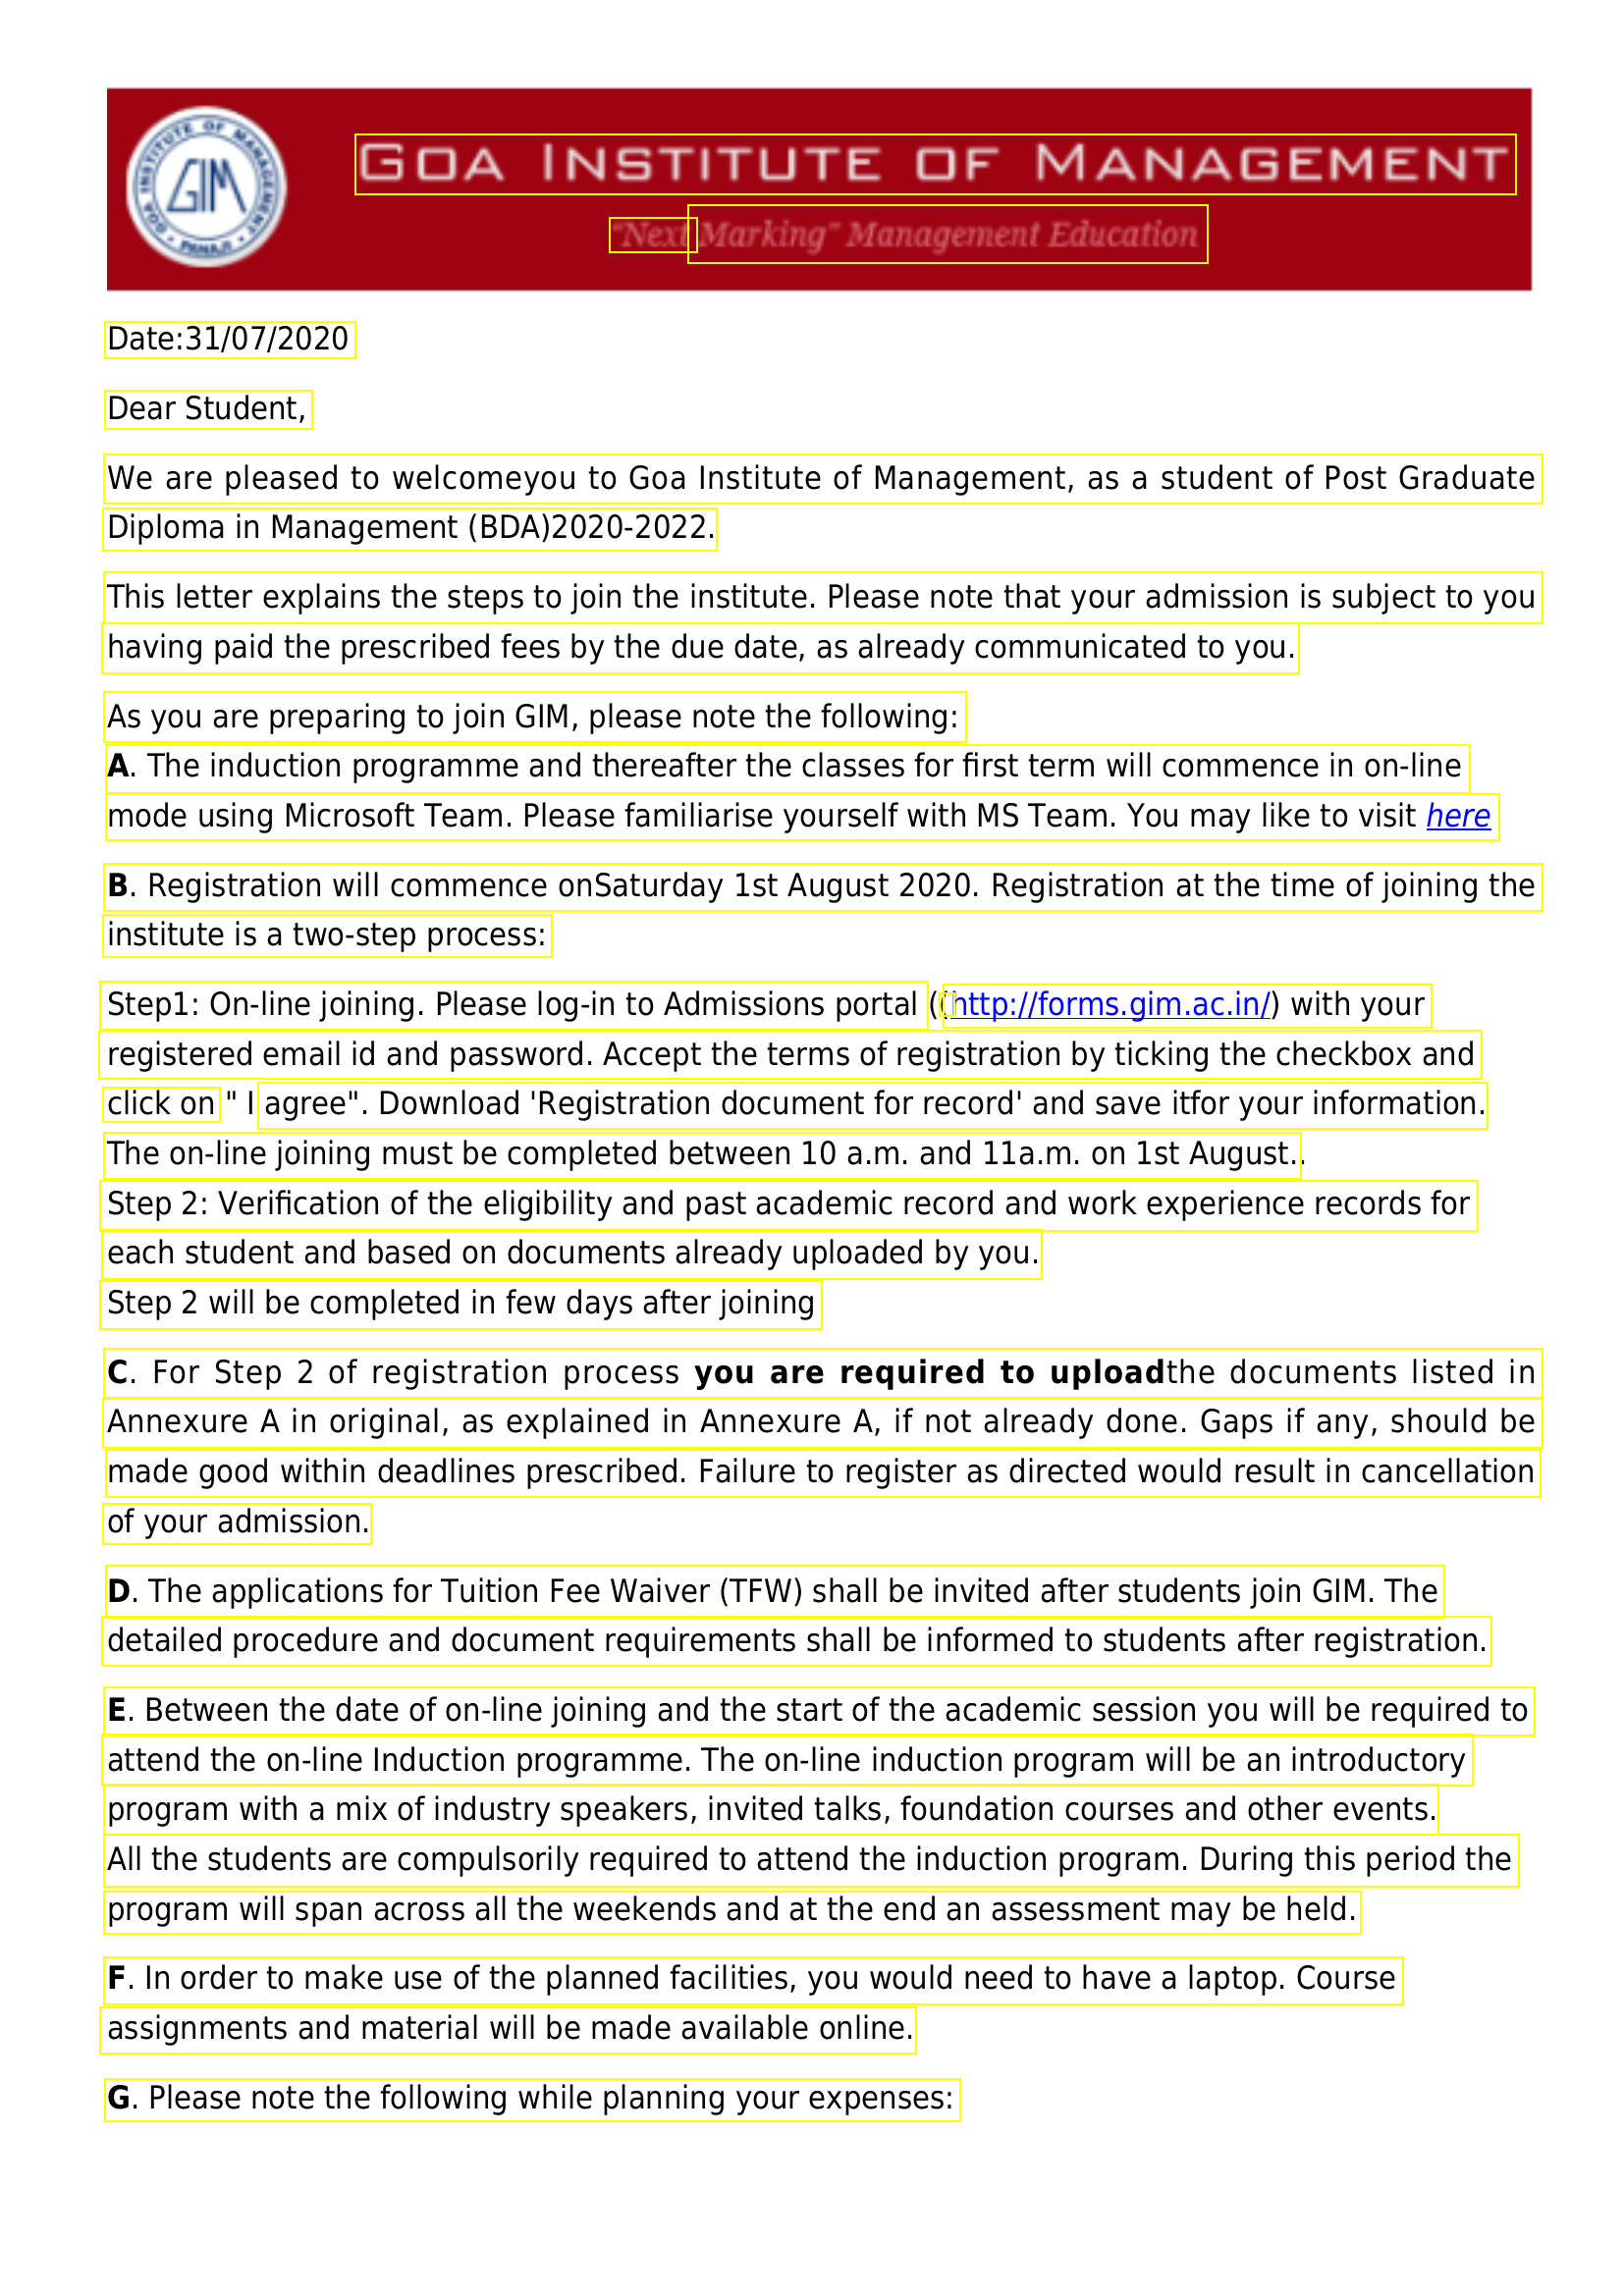

In [87]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [90]:
bounds[0][1]

'GOA INSTITUTE OF MANAGEMENT'

In [91]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

GOA INSTITUTE OF MANAGEMENT
FNett
Marking " Management Education
Date:31/07/2020
Dear Student,
We are pleased to welcomeyou to Goa Institute of Management; as a student of Post Graduate
Diploma in Management (BDA)2020-2022.
This letter explains the steps to join the institute. Please note that your admission is subject to you
having paid the prescribed fees by the due date, as already communicated to you.
As you are preparing to join GIM, please note the following:
A, The induction programme and thereafter the classes for first term will commence in on-line
mode using Microsoft Team. Please familiarise yourself with MS Team: You may like to visit here
B. Registration will commence onSaturday 1st August 2020. Registration at the time of joining the
institute is a two-step process:
Stepl: On-line joining: Please log-in to Admissions portal
(
(http lforms gim acinl) with your
registered email id and password. Accept the terms of registration by ticking the checkbox and
click on
agree". Do

In [92]:
nlp=spacy.load('en_core_web_sm')

In [93]:
doc = nlp(text)

In [94]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)